## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = study_results.merge(mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice.
combined_data["Mouse ID"].nunique()

249

In [10]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_Mouse_ID = combined_data.loc[(combined_data.duplicated(["Mouse ID","Timepoint"]) == True),"Mouse ID"].reset_index()
del duplicate_Mouse_ID["index"]
duplicate_Mouse_ID = duplicate_Mouse_ID["Mouse ID"].unique()[0]

In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data[combined_data["Mouse ID"] == duplicate_Mouse_ID]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.loc[(combined_data["Mouse ID"] != "g989")]
cleaned_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [13]:
# Checking the number of mice in the clean DataFrame.
cleaned_data["Mouse ID"].nunique()

248

## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
# Step 1: Remove the unnecessary columns
Drug_Regimen = cleaned_data[["Drug Regimen","Tumor Volume (mm3)"]]

# Step 2: Create a series for each statistic
Drug_Regimen_mean   = Drug_Regimen.groupby("Drug Regimen").mean().rename(columns={"Tumor Volume (mm3)" : "Mean"})
Drug_Regimen_median = Drug_Regimen.groupby("Drug Regimen").median().rename(columns={"Tumor Volume (mm3)" : "Median"})
Drug_Regimen_var    = Drug_Regimen.groupby("Drug Regimen").var().rename(columns={"Tumor Volume (mm3)" : "Variance"})
Drug_Regimen_std    = Drug_Regimen.groupby("Drug Regimen").std().rename(columns={"Tumor Volume (mm3)" : "Standard Deviation"})
Drug_Regimen_sem    = Drug_Regimen.groupby("Drug Regimen").sem().rename(columns={"Tumor Volume (mm3)" : "SEM"})

# Step 3: Merge all the series together
Drug_Regimen_Table_One = Drug_Regimen_mean.join([Drug_Regimen_median, Drug_Regimen_var, Drug_Regimen_std, Drug_Regimen_sem])

#Step 4: Print the result as a table
Drug_Regimen_Table_One

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
# Step 1: Remove the unnecessary columns
Drug_Regimen = cleaned_data[["Drug Regimen","Tumor Volume (mm3)"]]

# Step 2: Get the "mean", "median", "var", "std" and "sem" of the tumor volume for each regimen
Drug_Regimen_Table_Two = Drug_Regimen.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])

# Step 3: Rename the columns
Drug_Regimen_Table_Two = Drug_Regimen_Table_Two.rename(columns={"mean" : "Mean", "median" : "Median" , "var" : "Variance", 
                                                        "std" : "Standard Deviation", "sem" : "SEM"
                                                 })

# Step 4: Print the result as a table
Drug_Regimen_Table_Two

Tumor Volume (mm3)                                           \
                           Mean     Median   Variance Standard Deviation   
Drug Regimen                                                               
Capomulin             40.675741  41.557809  24.947764           4.994774   
Ceftamin              52.591172  51.776157  39.290177           6.268188   
Infubinol             52.884795  51.820584  43.128684           6.567243   
Ketapril              55.235638  53.698743  68.553577           8.279709   
Naftisol              54.331565  52.509285  66.173479           8.134708   
Placebo               54.033581  52.288934  61.168083           7.821003   
Propriva              52.320930  50.446266  43.852013           6.622085   
Ramicane              40.216745  40.673236  23.486704           4.846308   
Stelasyn              54.233149  52.431737  59.450562           7.710419   
Zoniferol             53.236507  51.818479  48.533355           6.966589   

                        
                   SEM  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.544332  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

## Bar and Pie Charts

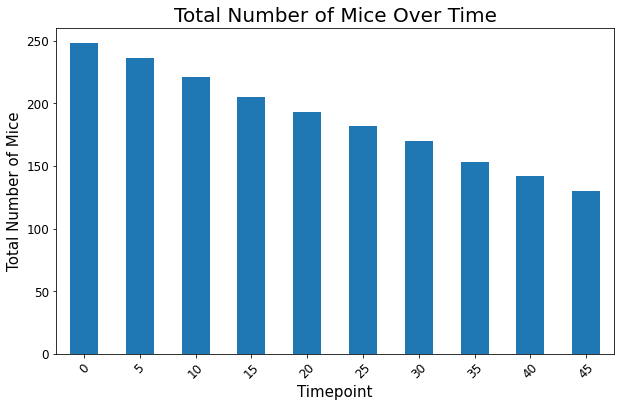

In [74]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Step 1: Get the total number of mice for each time period
mouse_numbers_over_time = cleaned_data[["Timepoint", "Mouse ID"]].groupby("Timepoint").count().reset_index()

# Step 2: Rename the "Mouse ID" column
mouse_numbers_over_time = mouse_numbers_over_time.rename(columns={"Mouse ID" : "Total Number of Mice"})

# Step 3: Plot the data
ax = mouse_numbers_over_time.plot(kind = "bar", x = "Timepoint", y = "Total Number of Mice", figsize = (10,6), legend = None)

# Step 4: Reformat all the labels, titles, and ticks
ax.set_xlabel(xlabel = "Timepoint", size = 15)
ax.set_ylabel(ylabel = "Total Number of Mice", size = 15)
ax.set_title("Total Number of Mice Over Time", size = 20)
ax.xaxis.set_tick_params(labelsize = 12, rotation = 45)
ax.yaxis.set_tick_params(labelsize = 12)

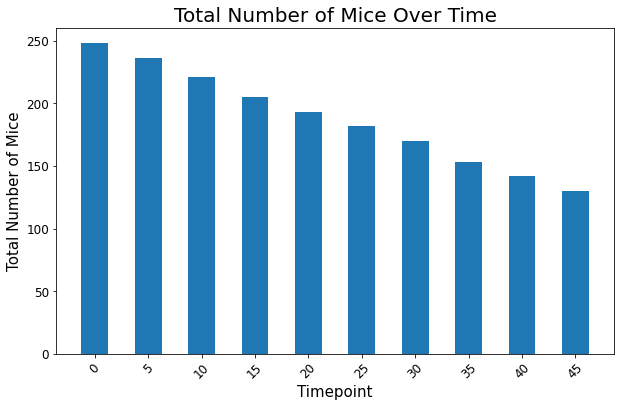

In [84]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Step 1: Create the chart and resize it.
plt.figure(figsize = (10,6))

# Step 1: Plot the chart
plt.bar( mouse_numbers_over_time["Timepoint"], mouse_numbers_over_time["Total Number of Mice"], width = 2.5 )

# Step 4: Reformat all the labels, titles, and ticks
plt.xlabel(xlabel = "Timepoint", size = 15)
plt.ylabel(ylabel = "Total Number of Mice", size = 15)
plt.title("Total Number of Mice Over Time", size = 20)
plt.xticks(ticks=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45], size = 12, rotation = 45)
plt.yticks(size = 12)

# Step 5: Show the chart
plt.show()

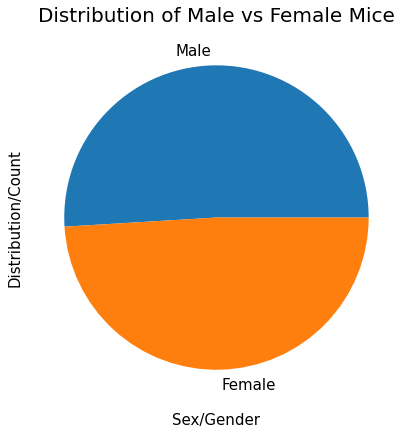

In [168]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Step 1: Get the a count of the number of males and females
male_female_distributions = cleaned_data["Sex"].value_counts()
male_female_distributions = pd.DataFrame(male_female_distributions)

# Step 2: Create the chart
mf_pie = male_female_distributions.plot.pie( y = "Sex", figsize = (7, 7), legend = None, fontsize = 15 )

# Step 3: Reformat all the labels, titles, and ticks
mf_pie.set_xlabel(xlabel = "Sex/Gender", size = 15)
mf_pie.set_ylabel(ylabel = "Distribution/Count", size = 15)
mf_pie.set_title(label = "Distribution of Male vs Female Mice", size = 20 )

# Step 4: Show the chart
plt.show()

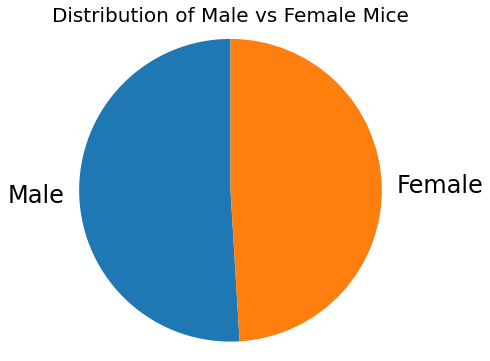

In [162]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Step 1: Create the figures
fig, axis = plt.subplots(figsize = (6, 6))

# Step 2: Get the a count of the number of males and females
male_female_distributions = cleaned_data["Sex"].value_counts()
male_female_distributions = pd.DataFrame(male_female_distributions)
male_female_distributions = male_female_distributions.reset_index()
male_female_distributions = male_female_distributions.rename(columns={ "index" : "Sex/Gender",
                                                                      "Sex" : "Distribution"})

# Step 3: Create the chart
axis.pie(male_female_distributions["Distribution"], labels=male_female_distributions["Sex/Gender"], startangle=90)

plt.title(label = "Distribution of Male vs Female Mice", size = 20 )
axis.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.show()

## Quartiles, Outliers and Boxplots

In [163]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = cleaned_data.groupby("Mouse ID").max("Timepoint").reset_index()
max_timepoint = max_timepoint[["Mouse ID", "Timepoint"]]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_volume_data = cleaned_data.merge( max_timepoint, on = ["Mouse ID", "Timepoint"] )
final_tumor_volume_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [165]:
# Put treatments into a list for for loop (and later for plot labels)
four_treatments_list = [ "Capomulin", "Ramicane", "Infubinol", "Ceftamin" ]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Step 1: Locate the rows which contain mice on each drug 
four_treatments_subset = final_tumor_volume_data.loc[final_tumor_volume_data["Drug Regimen"].isin(four_treatments_list)]

# Step 2: Get the tumor volumes
four_treatments_subset = four_treatments_subset[["Drug Regimen","Tumor Volume (mm3)"]].reset_index()
del four_treatments_subset["index"]

# Step 3: Get the quartiles for each treatment
quartiles = four_treatments_subset.groupby("Drug Regimen").quantile([.25,.5,.75]).reset_index()
quartiles = quartiles.rename(columns={"level_1" : "Quartile"})

# Step 4: Get the IQR for each treatment
for treatment in four_treatments_list:
    
    lower_quartile = quartiles.loc[((quartiles["Drug Regimen"] == treatment) & (quartiles["Quartile"] == 0.25)), 
                           "Tumor Volume (mm3)"].values[0]
    
    upper_quartile = quartiles.loc[((quartiles["Drug Regimen"] == treatment) & (quartiles["Quartile"] == 0.75)), 
                           "Tumor Volume (mm3)"].values[0]
    
    inter_quartile_range = upper_quartile - lower_quartile

    lower_bound = lower_quartile - (1.5*inter_quartile_range)
    
    upper_bound = upper_quartile + (1.5*inter_quartile_range)
    
    lower_bound = lower_bound
    
    upper_bound = upper_bound

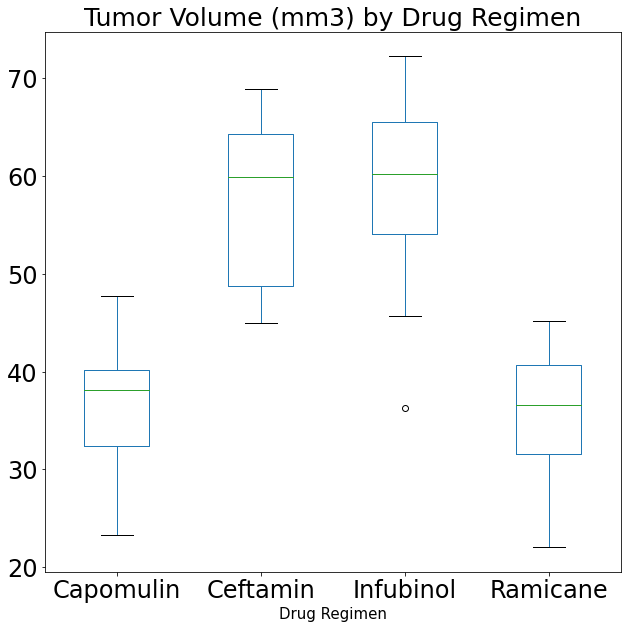

In [189]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Step 1: Create the chart
four_treatments_boxplot = four_treatments_subset.boxplot(by = "Drug Regimen", figsize = (10, 10), grid = False)

# Step 2: Reformat all the labels, titles, and ticks
four_treatments_boxplot.set_xlabel(xlabel = "Drug Regimen", size = 15)
four_treatments_boxplot.set_title(label = "Tumor Volume (mm3) by Drug Regimen", size = 25)
plt.suptitle("")

# Step 3: Show the plots
plt.show()

## Line and Scatter Plots

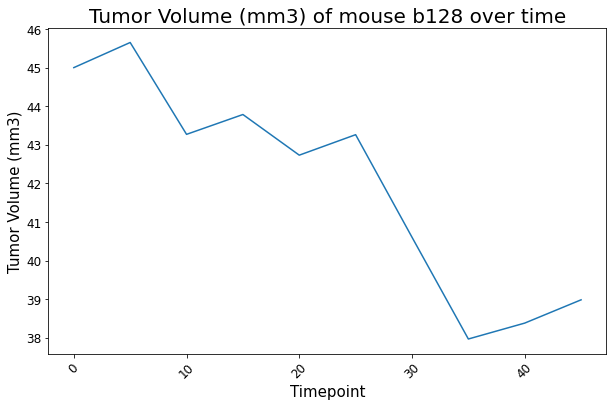

In [193]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Step 1: Get the "Mouse ID" of the mouse of the first mouse in the "Capomulin" Drug Regimen
Capomulin_first_mouse = cleaned_data.loc[(cleaned_data["Drug Regimen"] == "Capomulin"),"Mouse ID"].head(1)[0]
# Step 2: Get all their data
Capomulin_first_mouse_data = cleaned_data.loc[(cleaned_data["Mouse ID"] == Capomulin_first_mouse)]

# Step 3: Plot their data 
Capomulin_first_mouse_line_plot = Capomulin_first_mouse_data.plot(x = "Timepoint", y = "Tumor Volume (mm3)", figsize = (10,6), legend = None)

# Step 4: Reformat all the labels, titles, and ticks
Capomulin_first_mouse_line_plot.set_xlabel(xlabel = "Timepoint", size = 15)
Capomulin_first_mouse_line_plot.set_ylabel(ylabel = "Tumor Volume (mm3)", size = 15)
Capomulin_first_mouse_line_plot.set_title(("Tumor Volume (mm3) of mouse " + Capomulin_first_mouse + " over time") , size = 20)
Capomulin_first_mouse_line_plot.xaxis.set_tick_params(labelsize = 12, rotation = 45)
Capomulin_first_mouse_line_plot.yaxis.set_tick_params(labelsize = 12)

# Step 5: Show the chart
plt.show()

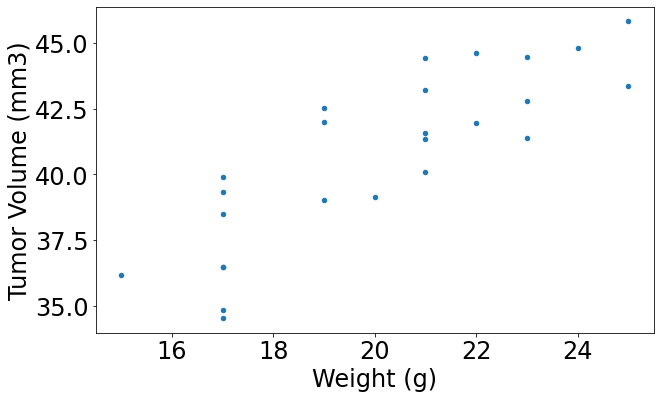

In [197]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Step 1: Get all the data belonging to the "Capomulin" Drug Regimen
Capomulin_data = cleaned_data.loc[(cleaned_data["Drug Regimen"] == "Capomulin")]

# Step 2: Remove Unnecessary Columns
Average_tumor_volume = Capomulin_data[["Mouse ID", "Tumor Volume (mm3)", "Weight (g)"]]

# Step 3: Get the average tumor volume of each mouse according to their weight
Average_tumor_volume = Average_tumor_volume.groupby(["Mouse ID","Weight (g)"]).mean().round(2).reset_index()


Average_tumor_volume_scatter = Average_tumor_volume.plot(kind = "scatter", x = "Weight (g)", y = "Tumor Volume (mm3)", 
                                                        figsize = (10, 6))

## Correlation and Regression

Text(20, 40, 'y = 0.95x + 21.56')

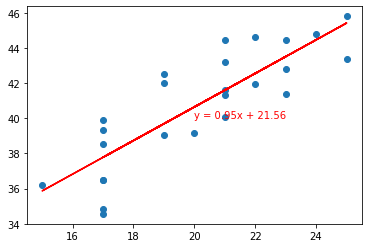

In [141]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = Average_tumor_volume["Weight (g)"]
y_values = Average_tumor_volume["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(20,40),fontsize=10,color="red")